In [1]:
import pandas as pd
df_tweets = pd.read_csv('elon_tweets.csv')
df_tweets = df_tweets.drop(columns=["like_count", "quote_count", "reply_count", "retweet_count"])
df_tweets.head()


,date,text
0,2021-07-07 18:48:11,Supersonic shock wave
1,2021-07-07 18:46:53,https://t.co/O3BGaFuMDO
2,2021-07-07 16:58:11,High res landing Falcon landing video https://...
3,2021-07-06 22:09:32,https://t.co/TQZ9QvcwH1
4,2021-07-05 07:12:04,Free Britney


In [2]:
# Data Pre-processing and make the tweets all lowercase and remove stopwords.
from nltk.corpus import stopwords
en_stop_words = set(stopwords.words('english'))
list(en_stop_words)[:30]

['both',
 'each',
 'have',
 'should',
 'is',
 'his',
 'between',
 'hasn',
 'll',
 'from',
 'doing',
 'ain',
 'd',
 "hasn't",
 'shouldn',
 'how',
 'can',
 'having',
 "weren't",
 'herself',
 'but',
 'an',
 'all',
 'nor',
 "didn't",
 'on',
 "isn't",
 'what',
 'had',
 'm']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime

import nltk
nltk.download('stopwords')

import pandas as pd
import re
import math

df = pd.read_csv('elon_tweets.csv')


tweet_col='text'
date_col='date'
start_datetime=datetime(2017,1,20, 0, 0, 0)
df_copy = df.copy()

# drop rows with empty values
df_copy.dropna(inplace=True)

# format the date
df_copy[date_col] = df_copy[date_col].apply(lambda row: datetime.strptime(row, '%Y-%m-%d %H:%M:%S'))

# filter rows older than a given date
df_copy = df_copy[df_copy[date_col] >=start_datetime]

# lower the tweets
df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str.lower()

# filter out stop words and URLs
en_stop_words = set(stopwords.words('english'))
extended_stop_words = en_stop_words | \
                    {
                        '&amp;', 'rt',                           
                        'th','co', 're', 've', 'kim', 'daca'
                    }
print(extended_stop_words)

url_re = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'        
df_copy['preprocessed_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: ' '.join([word for word in row.split() if (not word in extended_stop_words) and (not re.match(url_re, word))]))
# tokenize the tweets
tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
df_copy['tokenized_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: tokenizer.tokenize(row))

 

df_tweets_clean = df_copy
df_tweets_clean.head()


C:\Users\zkirsan\anaconda3\envs\mlenv\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


{'both', 'each', 'have', 'should', 'is', 'his', 'between', 'hasn', 'll', 'from', 'doing', 'ain', 'd', "hasn't", 'shouldn', 'how', 'can', 'having', "weren't", 'herself', 'but', 'an', 'all', 'nor', "didn't", 'on', "isn't", 'what', 'had', 'm', 'further', 'its', 'about', 'down', 'whom', 'will', 'their', 'once', "aren't", 'that', 'as', 'do', 'needn', 'are', 'didn', 'has', 'then', 'while', 'out', 'am', 'co', 'themselves', 'below', 'isn', 'other', 'mustn', 'why', 'few', "mightn't", 'ours', 'where', "you'd", "doesn't", 'very', 'them', 'ourselves', 'a', 't', 'he', 's', 'this', 'same', 'himself', 'her', 'so', 'y', 'been', 'aren', 'who', 'not', 'don', 'our', 'it', 'when', 'again', 'too', 'she', 'they', "shouldn't", 'your', 'won', 'to', 'wouldn', 'after', 'now', 'and', "you've", 'above', 'couldn', 'off', 'rt', 'hadn', 'doesn', "should've", "couldn't", 'yourself', 'over', 'shan', 'just', 'did', "won't", 'ma', 'up', 'th', 'some', 'which', "shan't", 'you', 'haven', "that'll", 'weren', 've', 'me', "yo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zkirsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,date,text,like_count,quote_count,reply_count,retweet_count,preprocessed_text,tokenized_text
0,2021-07-07 18:48:11,Supersonic shock wave,19187,54,1053,707,supersonic shock wave,"[supersonic, shock, wave]"
1,2021-07-07 18:46:53,https://t.co/O3BGaFuMDO,33472,133,1013,1753,,[]
2,2021-07-07 16:58:11,High res landing Falcon landing video https://...,124251,1620,6850,12837,high res landing falcon landing video,"[high, res, landing, falcon, landing, video]"
3,2021-07-06 22:09:32,https://t.co/TQZ9QvcwH1,288424,2459,16067,32327,,[]
4,2021-07-05 07:12:04,Free Britney,433153,3443,17335,52974,free britney,"[free, britney]"


In [4]:
df_tweets_clean = df_tweets_clean[['date', 'text', 'preprocessed_text', 'tokenized_text', 'like_count', 'quote_count', 'reply_count', 'retweet_count']]

In [5]:
df_tweets_clean.head(10)

,date,text,preprocessed_text,tokenized_text,like_count,quote_count,reply_count,retweet_count
0,2021-07-07 18:48:11,Supersonic shock wave,supersonic shock wave,"[supersonic, shock, wave]",19187,54,1053,707
1,2021-07-07 18:46:53,https://t.co/O3BGaFuMDO,,[],33472,133,1013,1753
2,2021-07-07 16:58:11,High res landing Falcon landing video https://...,high res landing falcon landing video,"[high, res, landing, falcon, landing, video]",124251,1620,6850,12837
3,2021-07-06 22:09:32,https://t.co/TQZ9QvcwH1,,[],288424,2459,16067,32327
4,2021-07-05 07:12:04,Free Britney,free britney,"[free, britney]",433153,3443,17335,52974
5,2021-07-04 18:06:48,Happy 4th to all!,happy 4th all!,"[happy, th, all]",84760,119,3431,3393
6,2021-07-04 17:59:19,Bless America https://t.co/QNagk4PArb,bless america,"[bless, america]",233678,1241,11343,12509
7,2021-07-03 21:23:23,New SpaceX Starlink cover shows transfer orbit...,new spacex starlink cover shows transfer orbit...,"[new, spacex, starlink, cover, shows, transfer...",95669,447,6371,6290
8,2021-07-02 13:20:14,https://t.co/oGKHhHROQa,,[],199927,2248,16274,19857
9,2021-07-02 13:09:28,"Congrats Tesla Team on over 200,000 car built ...","congrats tesla team 200,000 car built delivere...","[congrats, tesla, team, car, built, delivered,...",173076,810,7851,10183


In [6]:
# the most common words and their count
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for tweet in df_tweets_clean.tokenized_text for word in tweet],30)

[('spacex', 178),
 ('tesla', 117),
 ('launch', 57),
 ('falcon', 55),
 ('dragon', 55),
 ('first', 45),
 ('crew', 37),
 ('nasa', 36),
 ('model', 31),
 ('space_station', 30),
 ('earth', 27),
 ('mission', 27),
 ('starship', 26),
 ('flight', 25),
 ('landing', 22),
 ('doge', 22),
 ('starlink', 21),
 ('new', 20),
 ('next', 19),
 ('confirmed', 19),
 ('astronauts', 19),
 ('great', 19),
 ('stage', 18),
 ('love', 18),
 ('mars', 16),
 ('live', 16),
 ('today', 16),
 ('make', 16),
 ('day', 16),
 ('booster', 16)]

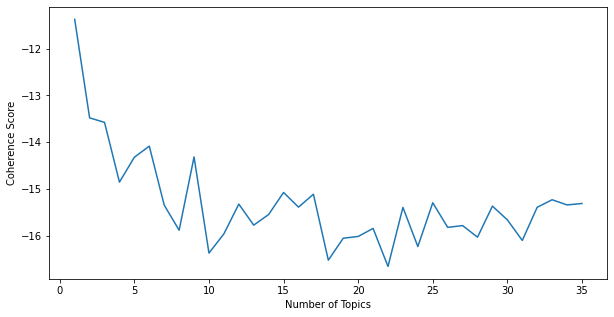

In [7]:
# Finding the number of topics using LDA(Latent Dirichlet Allocation)
# build a dictionary where for each tweet, each word has its own id.
# We have **** tweets and **** words in the dictionary.
tweets_dictionary = Dictionary(df_tweets_clean.tokenized_text)

# build the corpus i.e. vectors with the number of occurence of each word per tweet
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in df_tweets_clean.tokenized_text]

# compute coherence
tweets_coherence = []
for nb_topics in range(1,36):
    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

# visualize coherence
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(range(1,36),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

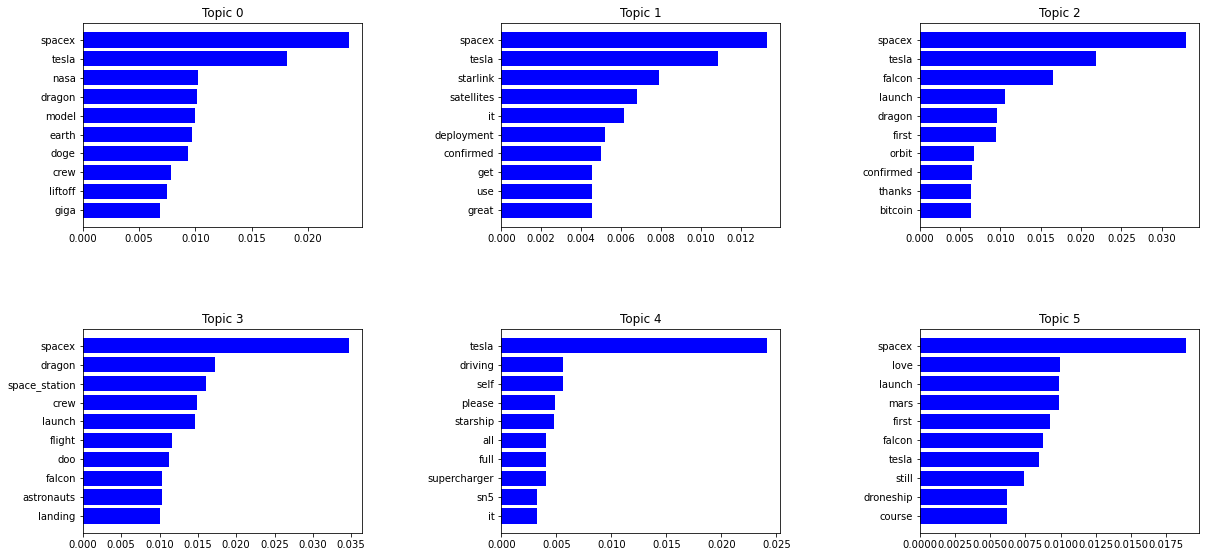

In [8]:
# Running LDA and the top 10 words for each of the topics 

import matplotlib.gridspec as gridspec
k = 6
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
  
plot_top_words()